# DMV Assignment-4

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# Imported Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Data Preprocessing

In [16]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [17]:
df.shape

(13320, 9)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [19]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [20]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

# Checking Null values

In [21]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [25]:
df['location'].fillna(df['location'].mode()[0], inplace=True)
df['size'].fillna(df['size'].mode()[0], inplace=True)
df['society'].fillna(df['society'].mode()[0], inplace=True)
df['bath'].fillna(df['bath'].mean(), inplace=True)
df['balcony'].fillna(df['balcony'].mean(), inplace=True)

In [26]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

# Checking Duplicate values

In [27]:
df.duplicated().sum()

529

In [28]:
data = df.drop_duplicates()
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200,2.0,1.0,51.00


In [29]:
data.shape

(12791, 9)

# Handle categorical variables

In [54]:
encoded_df = pd.get_dummies(data, columns=['area_type', 'availability'], drop_first=True)
encoded_df

,location,size,society,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,...,availability_21-Oct,availability_21-Sep,availability_22-Dec,availability_22-Jan,availability_22-Jun,availability_22-Mar,availability_22-May,availability_22-Nov,availability_Immediate Possession,availability_Ready To Move
0,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.000000,39.07,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.000000,120.00,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.000000,62.00,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.000000,95.00,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,Kothanur,2 BHK,GrrvaGr,1200,2.0,1.000000,51.00,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.000000,112.00,0,0,1,...,0,0,0,0,0,0,0,0,0,1
13315,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.000000,231.00,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13316,Richards Town,4 BHK,GrrvaGr,3600,5.0,1.584376,400.00,0,0,1,...,0,0,0,0,0,0,0,0,0,1
13317,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.000000,60.00,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Data aggregation

In [55]:
neighborhood_avg_prices = data.groupby('location')['price'].mean()
neighborhood_avg_prices.head()

location
 Anekal                  16.000000
 Banaswadi               35.000000
 Basavangudi             50.000000
 Bhoganhalli             22.890000
 Devarabeesana Halli    124.833333
Name: price, dtype: float64

# Identify and handle outliers

<AxesSubplot:xlabel='price'>

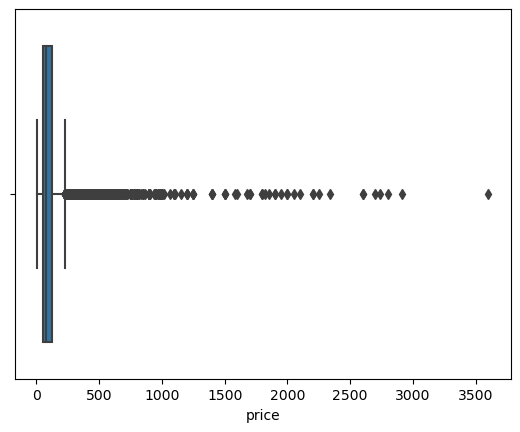

In [56]:
sns.boxplot(data["price"])

In [66]:
# Calculate the IQR for the 'price' column
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]

# Remove outliers from the dataframe
cleaned_df = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]


<AxesSubplot:xlabel='price'>

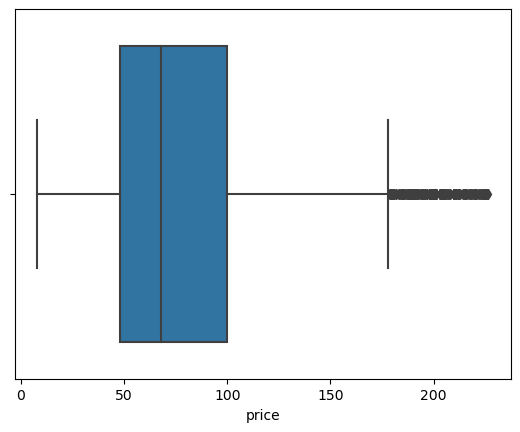

In [67]:
sns.boxplot(cleaned_df["price"])